In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pdS

In [ ]:
# Xử lý dữ liệu
df = pd.read_csv('data.csv')

# fill NaN = column mean
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing) 
    if num_missing > 0:
        med = df[col].median() 
        df[col] = df[col].fillna(med)


# fill NaN = top values in column
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values


df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  
        mod = df[col].describe()['top'] 
        df[col] = df[col].fillna(mod) 


# print(df_non_numeric)
for i in range(0, len(df_non_numeric.columns)):
    # print(df_non_numeric[df_non_numeric.columns[i]])
    list_set = set(df_non_numeric[df_non_numeric.columns[i]])
    unique = (list(list_set))
    # print(len(unique))
    for j in range(0, len(unique)):
        df[df_non_numeric.columns[i]] = df[df_non_numeric.columns[i]].replace(unique[j], j)

# print(df_non_numeric)
df.to_csv("./cleaned_data.csv", index=False)

In [ ]:

# df = df
X,Y = df.iloc[:,0:23], df.iloc[:,23]
print(X.shape, Y.shape)
print(X.columns)
# print(df.isnull().sum()) # not null
# print(X.iloc[:,1])

In [ ]:
def sum(x):
    s = 0
    for i in range(len(x)):
        s = s + x[i]
    return s

def mean(x):
    return sum(x)/len(x)
    
def covariance1(x,y):
    s = 0
    mean_x = mean(x)
    mean_y = mean(y)
    for i in range(len(x)):
        s = s + (x[i]-mean_x)*(y[i]-mean_y)
    return s/(len(x)-1)

# def covariance(x,y):
#     return np.cov(x,y)

def correlation(x,y):
    std_x = covariance1(x,x)
    std_y = covariance1(y,y)
    return covariance1(x,y)/np.sqrt((std_x*std_y))

corr={}

for i in range(len(X.columns)):
    # print(X.columns[i],covariance1(X.iloc[:,i],Y),correlation(X.iloc[:,i],Y))
    cur=[]
    for j in range(len(X.columns)):
        cur.append(correlation(X.iloc[:,i],X.iloc[:,j]))
    cur.append(correlation(X.iloc[:,i],Y))
    corr[X.columns[i]]=cur

cur = []
for i in range(len(X.columns)):
    # print(X.columns[i],corr[X.columns[i]])
    cur.append(correlation(X.iloc[:,i],Y))
cur.append(correlation(Y,Y))
corr['Y']=cur


# corr=df.corr()
# # print(df.corr())



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#paint correlation
corr = pd.DataFrame(corr,columns=corr.keys(),index=corr.keys())
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1, linecolor='white', fmt='.2f',ax=ax)
plt.show()

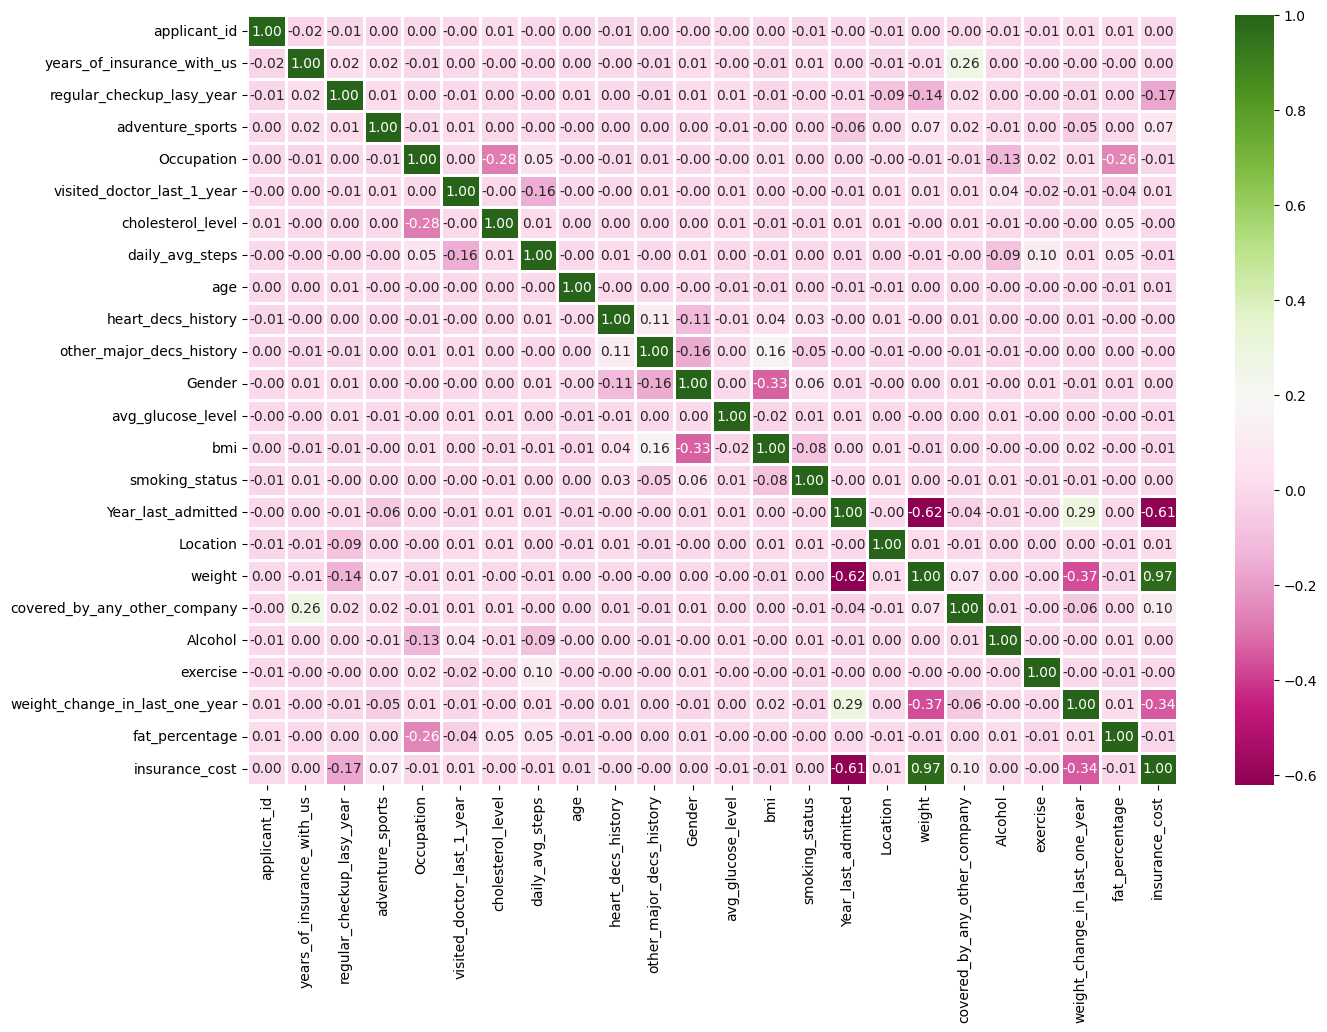

In [7]:
corr1= df.corr()
# # print(df.corr())
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#paint correlation
corr = pd.DataFrame(corr1,columns=corr1.keys(),index=corr1.keys())
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1, linecolor='white', fmt='.2f',ax=ax)
plt.show()

In [21]:
X_drop = df[['weight_change_in_last_one_year','weight','Year_last_admitted']]
X_notdrop = X
print(X_drop.columns)

X_train,X_test,Y_train,Y_test = train_test_split(X_notdrop,Y,test_size=0.3,random_state=0)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=0)
print(X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

model = LinearRegression()
model.fit(X_train,Y_train)
yhat = model.predict(X_test)
# mae = mean_absolute_error(Y_test, yhat)
# print(mae)
# y = f(x) = a0*x0 + a1*x1 + a2*x2 +... +an*xn + bias
# coef là hệ số a0,a1,a2,...,an
# print(model.coef_) 
print(model.intercept_) # bias
print(r2_score(Y_test, yhat)) 
print(mean_absolute_error(Y_test, yhat))# tỉ lệ sai số

Index(['weight_change_in_last_one_year', 'weight', 'Year_last_admitted'], dtype='object')
(17500, 23) (3750, 23) (3750, 23) (17500,) (3750,) (3750,)
8894.53455695683
0.9466514373135538
2671.2981245906094


In [22]:
print(pd.DataFrame({'predict':yhat,'actual':Y_test}))


            predict  actual
16870  35204.977991   39488
24802  20170.661951   18510
14251  25875.601192   25914
15902  24862.472920   24680
5107   39272.087245   39488
...             ...     ...
11639  26376.540014   23446
21022  10504.059695    8638
13767  31594.308694   33318
3512   50158.492112   53062
21652  26761.354766   27148

[3750 rows x 2 columns]
